In [1]:
import json

import networkx as nx
import osmnx
import osmnx as ox
import matplotlib.pyplot as plt
import geojson

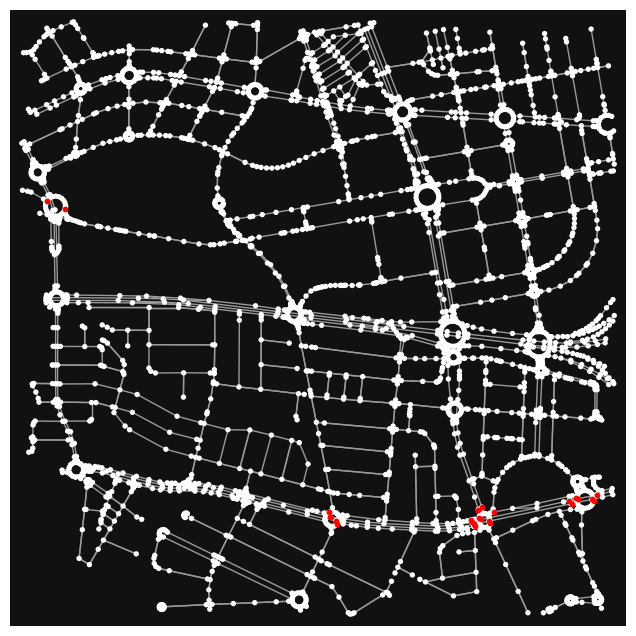

[(21497117, 21497131, {'osmid': 359280372, 'lanes': '3', 'name': 'Plaza Pintor Sandro Botticelli', 'highway': 'secondary', 'junction': 'roundabout', 'oneway': True, 'reversed': False, 'length': 13.66, 'bearing': 238.2}), (21497122, 358423298, {'osmid': 32009052, 'lanes': '3', 'name': 'Plaza Pintor Sandro Botticelli', 'highway': 'secondary', 'junction': 'roundabout', 'oneway': True, 'reversed': False, 'length': 10.27, 'bearing': 271.2}), (21497123, 21497122, {'osmid': 32009052, 'lanes': '3', 'name': 'Plaza Pintor Sandro Botticelli', 'highway': 'secondary', 'junction': 'roundabout', 'oneway': True, 'reversed': False, 'length': 11.589, 'bearing': 288.9}), (21497131, 359002445, {'osmid': 359280372, 'lanes': '3', 'name': 'Plaza Pintor Sandro Botticelli', 'highway': 'secondary', 'junction': 'roundabout', 'oneway': True, 'reversed': False, 'length': 12.052, 'bearing': 216.2}), (250962328, 10610504972, {'osmid': 32009309, 'oneway': True, 'lanes': '2', 'ref': 'A-357', 'name': 'Autovía del Guada

In [40]:
# Initialize an empty set to store unique values
street_names = set()

# Iterate over the edges and extract the values
for u, v, data in G.edges(data=True):
    if 'name' in data:
        street_names.add(data['name'])

everything_important = {
    'amenity': ['restaurant', 'pub', 'bar', 'hotel'],
    'tourism': ['hotel'],
    'public_transport': ['stop_position', 'platform'],
    'shop': ['supermarket', 'convenience', 'bakery'],
    'highway': ['bus_stop', 'crossing', 'traffic_signals'],
    'leisure': ['sports_centre'],
    'railway': ['station', 'halt'],
    # Additional traffic flow related tags
    'traffic_signals': ['give_way', 'stop', 'signal'],
    # traffic lights
}

crossing = {
    'highway': ['traffic_signals'],
}

traffic_signals = {
    "traffic_signals": ["signal", "traffic_lights"]
}

test = {
    'highway': 'traffic_signals'
}

# Point that represents the desired location to translate
lat = 36.71341846443054
lon = -4.472105013872079

G = ox.graph_from_point((lat, lon), dist=1100, network_type='drive', simplify=False)
G = ox.bearing.add_edge_bearings(G)

nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)
gdf = ox.features_from_point((lat, lon), tags=test, dist=1100)
gdf

fig, ax = ox.plot_graph(G, show=False, close=False)

# Plot the points of interest (traffic signals)
gdf.plot(ax=ax, marker='o', color='red', markersize=10)

# Show the map
plt.show()

print(G.edges(data=True))

In [14]:
# Categorize the GeoDataFrames of the POIs retrieved from the OSM API

crossing = gdf[(gdf['highway'] == 'crossing')]

bus_stops = gdf[(gdf['highway'] == 'bus_stop') | (gdf['bus'] == 'yes')]

railway_stations = gdf[
    (gdf['railway'] == 'station') & (gdf['public_transport'] != 'stop_position') & (gdf['bus'] != 'yes')]

restaurants = gdf[(gdf['amenity'] == 'restaurant') | (gdf['amenity'] == 'pub') | (gdf['amenity'] == 'bar')]

bakery_convenience_supermarket = gdf[
    (gdf['shop'] == 'supermarket') | (gdf['shop'] == 'convenience') | (gdf['shop'] == 'bakery')]

rest = gdf[
    (gdf['highway'] != 'crossing')
    & (gdf['highway'] != 'bus_stop') & (gdf['bus'] != 'yes')
    & (gdf['railway'] != 'station') & (gdf['public_transport'] != 'stop_position')
    & (gdf['amenity'] != 'restaurant') & (gdf['amenity'] != 'pub') & (gdf['amenity'] != 'bar')
    & (gdf['shop'] != 'supermarket') & (gdf['shop'] != 'convenience') & (gdf['shop'] != 'bakery')
    ]

rest


highway  \
element_type osmid                          
node         1039228490   traffic_signals   
             1630065311   traffic_signals   
             1630065434   traffic_signals   
             2009791698   traffic_signals   
             2728622723   traffic_signals   
             2728622729   traffic_signals   
             2728622733   traffic_signals   
             3653887204   traffic_signals   
             3653887205   traffic_signals   
             3653887206   traffic_signals   
             3653887209   traffic_signals   
             6673740454   traffic_signals   
             6673740455   traffic_signals   
             10614030673  traffic_signals   
             10614030703  traffic_signals   
             10614064607  traffic_signals   
             10614064608  traffic_signals   
             10614064609  traffic_signals   
             10614064610  traffic_signals   
             10614064611  traffic_signals   
             10614064612  traffic_signals   
             10614064613  traffic_signals   
             10614064614  traffic_signals   
             10614064615  traffic_signals   
way          190247555                NaN   
             504221188            footway   
             504221189            footway   
             504221194                NaN   
             504221195                NaN   
             504224083                NaN   
             504224084                NaN   
             553123767                NaN   
             564045348                NaN   
             619002827                NaN   
             623720643                NaN   
             633719303                NaN   
             762887713                NaN   
             902814835                NaN   

                                                                   geometry  \
element_type osmid                                                            
node         1039228490                           POINT (-4.47130 36.70653)   
             1630065311                           POINT (-4.46492 36.70658)   
             1630065434                           POINT (-4.46153 36.70722)   
             2009791698                           POINT (-4.46134 36.70741)   
             2728622723                           POINT (-4.47136 36.70665)   
             2728622729                           POINT (-4.47161 36.70678)   
             2728622733                           POINT (-4.47164 36.70692)   
             3653887204                           POINT (-4.46062 36.70731)   
             3653887205                           POINT (-4.46071 36.70735)   
             3653887206                           POINT (-4.46127 36.70738)   
             3653887209                           POINT (-4.46049 36.70751)   
             6673740454                           POINT (-4.48262 36.71706)   
             6673740455                           POINT (-4.48339 36.71731)   
             10614030673                          POINT (-4.46165 36.70731)   
             10614030703                          POINT (-4.46540 36.70673)   
             10614064607                          POINT (-4.46558 36.70646)   
             10614064608                          POINT (-4.46560 36.70653)   
             10614064609                          POINT (-4.46570 36.70660)   
             10614064610                          POINT (-4.46573 36.70667)   
             10614064611                          POINT (-4.46500 36.70663)   
             10614064612                          POINT (-4.46530 36.70669)   
             10614064613                          POINT (-4.46528 36.70710)   
             10614064614                          POINT (-4.46542 36.70699)   
             10614064615                          POINT (-4.46478 36.70693)   
way          190247555    POLYGON ((-4.48113 36.71637, -4.48118 36.71638...   
             504221188    LINESTRING (-4.47899 36.71656, -4.47820 36.71645)   
             50422118

In [15]:


def geojson_points(gdf, color="#ffffff"):
    features = []

    for i, row in gdf.iterrows():

        # If geometry is not point skip
        if row['geometry'].geom_type != 'Point':
            continue

        feature = {
            "type": "Feature",
            "properties": {
                "marker-size": "small",
                "marker-color": color,
            },
            "geometry": {
                "type": "Point",
                "coordinates": [row['geometry'].x, row['geometry'].y]
            }
        }
        # for key, value in row.items():
        #     if key != 'geometry':
        #         feature['properties'][key] = value
        features.append(feature)
    return {
        "features": features
    }


crossing_geojson = geojson_points(crossing)
bus_stops_geojson = geojson_points(bus_stops, color="red")
railway_stations_geojson = geojson_points(railway_stations, color="green")
restaurants_geojson = geojson_points(restaurants, color="yellow")
bakery_convenience_supermarket_geojson = geojson_points(bakery_convenience_supermarket, color="blue")

# print(json.dumps(crossing_geojson["features"]))
# print(json.dumps(bus_stops_geojson["features"]))
# print(json.dumps(railway_stations_geojson["features"]))
# print(json.dumps(restaurants_geojson["features"]))
# print(json.dumps(bakery_convenience_supermarket_geojson["features"]))

# Join all the GeoJSONs features
all_features = crossing_geojson["features"] + bus_stops_geojson["features"] + railway_stations_geojson["features"] + \
               restaurants_geojson["features"] + bakery_convenience_supermarket_geojson["features"]

print(json.dumps(all_features)[1:-1])



{"type": "Feature", "properties": {"marker-size": "small", "marker-color": "#ffffff"}, "geometry": {"type": "Point", "coordinates": [-4.4761198, 36.7169391]}}, {"type": "Feature", "properties": {"marker-size": "small", "marker-color": "#ffffff"}, "geometry": {"type": "Point", "coordinates": [-4.4681925, 36.7177166]}}, {"type": "Feature", "properties": {"marker-size": "small", "marker-color": "#ffffff"}, "geometry": {"type": "Point", "coordinates": [-4.4672011, 36.7170007]}}, {"type": "Feature", "properties": {"marker-size": "small", "marker-color": "#ffffff"}, "geometry": {"type": "Point", "coordinates": [-4.4677113, 36.7168661]}}, {"type": "Feature", "properties": {"marker-size": "small", "marker-color": "#ffffff"}, "geometry": {"type": "Point", "coordinates": [-4.4758666, 36.7188872]}}, {"type": "Feature", "properties": {"marker-size": "small", "marker-color": "#ffffff"}, "geometry": {"type": "Point", "coordinates": [-4.4688776, 36.7195947]}}, {"type": "Feature", "properties": {"mark